# Subprocess module

> The subprocess module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes. This module intends to replace several older modules and functions:

```
os.system
os.spawn*
os.popen*
popen2.*
commands.*
```

[Official documentation](https://docs.python.org/2/library/subprocess.html#module-subprocess)

In [1]:
import subprocess

## Basics of command line

Command line is a text interface to Operating System (OS). Such shells like `bash` or (my favorite) `zsh` not only allow you to run executables but also have traits of programming languages enabling scripting (see [REPL](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop)).

Running executable has access to:
  * Environment variables
  * Command line arguments
  * Standard input
  * Standard output and standard error

Jupyter allows you to run shell commands using this syntax:

In [11]:
!hostname

zoe.local


In [15]:
!man hostname


HOSTNAME(1)               BSD General Commands Manual              HOSTNAME(1)

NNAAMMEE
     hhoossttnnaammee -- set or print name of current host system

SSYYNNOOPPSSIISS
     hhoossttnnaammee [--ffss] [_n_a_m_e_-_o_f_-_h_o_s_t]

DDEESSCCRRIIPPTTIIOONN
     The hhoossttnnaammee utility prints the name of the current host.  The super-user
     can set the hostname by supplying an argument.  To keep the hostname
     between reboots, run `scutil --set HostName _n_a_m_e_-_o_f_-_h_o_s_t'.

     Options:

     --ff    Include domain information in the printed name.  This is the
           default behavior.

     --ss    Trim off any domain information from the printed name.

SSEEEE AALLSSOO
     gethostname(3), scutil(8)

HHIISSTTOORRYY
     The hhoossttnnaammee command appeared in 4.2BSD.

BSD                            December 7, 2006                            BSD


Running commands from terminal window:

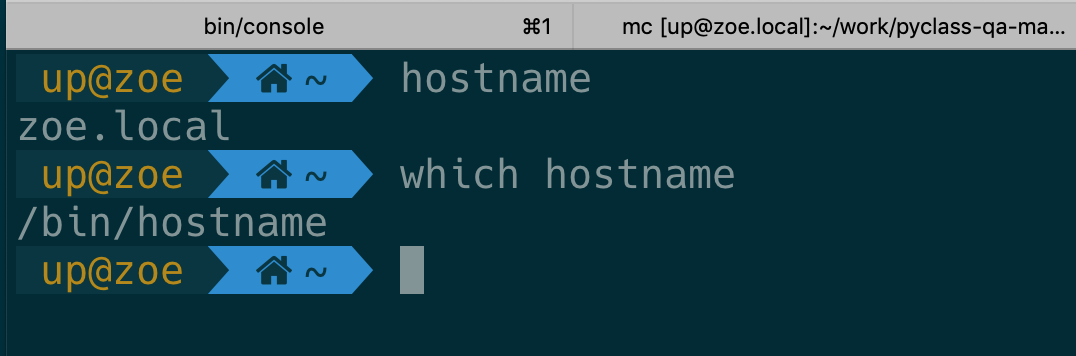

Typically executables print messages to the standard (or error) output. Usually this "standard output" is just your terminal screen. You can redirect output to a file using `>` symbol. If you don't need the output, you can drop it by redirecting to the "NULL device".

Here command `host localhost` resolves `localhost` (which is your local computer):

In [16]:
!host localhost

localhost has address 127.0.0.1
localhost has IPv6 address ::1


To avoid this output be printed out, use redirection to `/dev/null` (or to `nul` on Windows):

In [17]:
!host localhost > /dev/null

Apart from printing something on the screen, executables also return "exit code". When executable stops running it becomes available in a shell variable `$?`.

In [19]:
!host localhost > /dev/null ; echo $?

0


Meaning of the exit code varies from program to program, but typically 0 (zero) means success.

Here's a slighly different example, `neverhost` for sure can't be resolved:

In [20]:
!host neverhost > /dev/null ; echo $?

1


Look, something different then zero returned, that usually means program reports failure.

**A rule of thumb:** it's often more reliable to check the exit code (which is an integer number) than parse the command output (which is a multiline string).

It is a common case that executables accept arguments (just like functions in Python). Here command `ls` is provided with two arguments:
 * `-l` is for producing extended output
 * `README.md` is a filename
 
Arguments are separated using spaces.

In [26]:
!ls -l README.md

-rw-r--r--  1 up  staff  62 Sep  5 00:33 README.md


## Running external programs from Python scripts

If you don't care about program's output, use `subprocess.call()`, it returns the exit code.

Please notice that command arguments must be provided in a Python list along with the command name.

In [28]:
subprocess.call(["host", "localhost"])

0

In [29]:
subprocess.call(["host", "neverhost"])

1

It is also possible to pass string argument, letting shell to parse the line. In this case you also need to provide `shell=True` parameter (be careful because this is unsecure).

In [31]:
subprocess.call("host localhost", shell=True)

0

If you need to capture the output, be sure to use `subprocess.check_output()`:

In [33]:
s = subprocess.check_output(["host", "localhost"])
print s

localhost has address 127.0.0.1
localhost has IPv6 address ::1



But this function also checks the exit code and if it's not zero, raises `CalledProcessError` exception:

In [35]:
subprocess.check_output(["host", "neverhost"])

CalledProcessError: Command '['host', 'neverhost']' returned non-zero exit status 1

Use try/except blocks to handle the error: 

In [39]:
try:
    subprocess.check_output(["host", "neverhost"])
except subprocess.CalledProcessError as ex:
    print ex.returncode # exit code
    print ex.output # captured output

1
Host neverhost not found: 3(NXDOMAIN)

